
🔹 Total Quantity and Revenue per Product:
      product  total_quantity  total_revenue
0  Product A              20          400.0
1  Product B              15          225.0
2  Product C              19          570.0


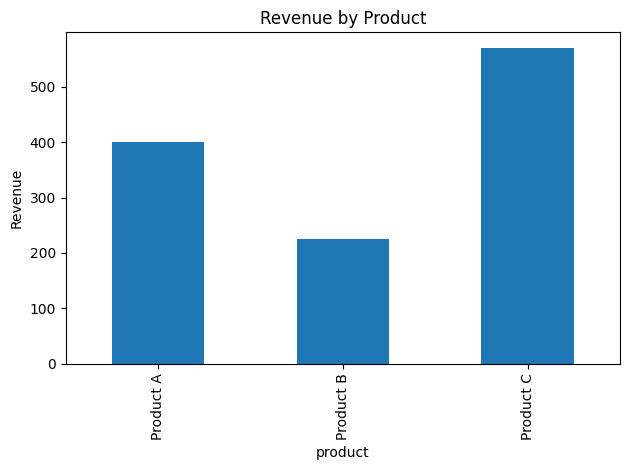


🔹 Daily Sales Revenue:
          date  daily_revenue
0  2025-07-01          275.0
1  2025-07-02          300.0
2  2025-07-03          150.0
3  2025-07-04          470.0


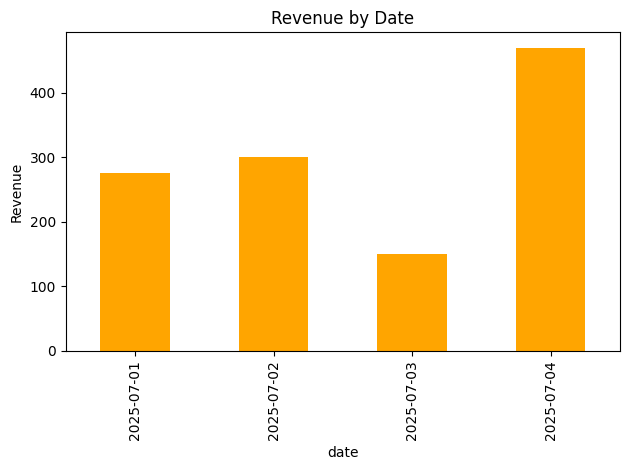


🔹 Total Units Sold per Product:
      product  units_sold
0  Product A          20
1  Product B          15
2  Product C          19


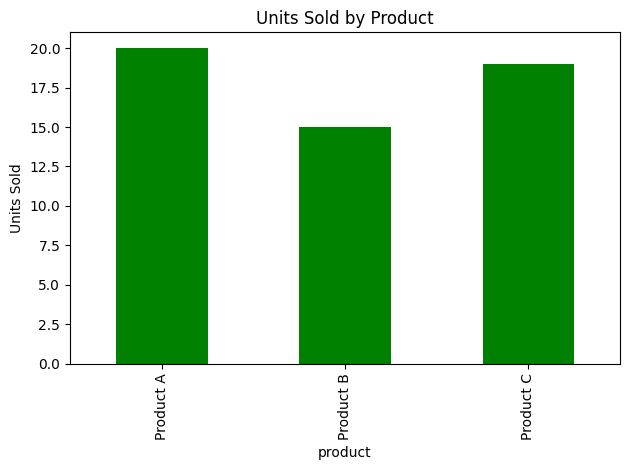


🔹 Average Price per Product:
      product  avg_price
0  Product A       20.0
1  Product B       15.0
2  Product C       30.0


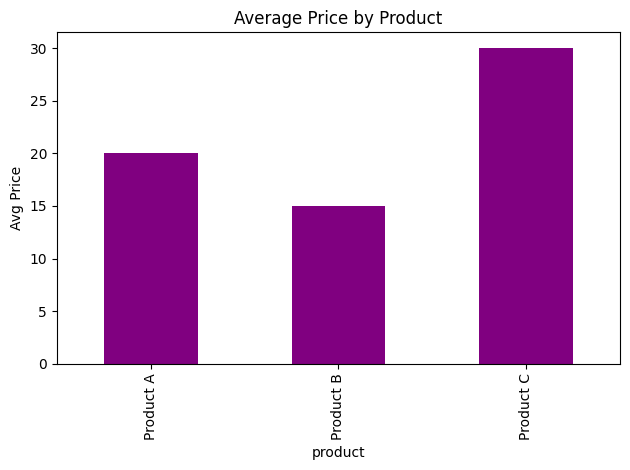


🔹 Product Revenue on 2025-07-04:
      product  revenue
0  Product A    140.0
1  Product B     60.0
2  Product C    270.0


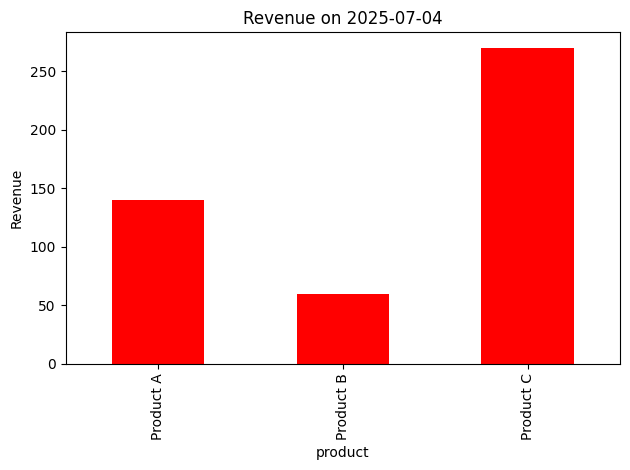

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite and create table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    date TEXT
)
""")

# Step 2: Insert sample data only if empty
sample_data = [
    ('Product A', 10, 20.0, '2025-07-01'),
    ('Product B', 5, 15.0, '2025-07-01'),
    ('Product A', 3, 20.0, '2025-07-02'),
    ('Product C', 8, 30.0, '2025-07-02'),
    ('Product B', 6, 15.0, '2025-07-03'),
    ('Product C', 2, 30.0, '2025-07-03'),
    ('Product A', 7, 20.0, '2025-07-04'),
    ('Product B', 4, 15.0, '2025-07-04'),
    ('Product C', 9, 30.0, '2025-07-04'),
]

cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    cursor.executemany("INSERT INTO sales (product, quantity, price, date) VALUES (?, ?, ?, ?)", sample_data)
    conn.commit()

# Step 3: SQL Query 1 - Total Quantity and Revenue per Product
query1 = """
SELECT product, SUM(quantity) AS total_quantity, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print("\n🔹 Total Quantity and Revenue per Product:\n", df1)
df1.plot(kind='bar', x='product', y='total_revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("chart1_revenue_by_product.png")
plt.show()

# Step 4: SQL Query 2 - Daily Revenue
query2 = """
SELECT date, SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY date
"""
df2 = pd.read_sql_query(query2, conn)
print("\n🔹 Daily Sales Revenue:\n", df2)
df2.plot(kind='bar', x='date', y='daily_revenue', title='Revenue by Date', color='orange', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("chart2_revenue_by_date.png")
plt.show()

# Step 5: SQL Query 3 - Total Units Sold per Product
query3 = """
SELECT product, SUM(quantity) AS units_sold
FROM sales
GROUP BY product
"""
df3 = pd.read_sql_query(query3, conn)
print("\n🔹 Total Units Sold per Product:\n", df3)
df3.plot(kind='bar', x='product', y='units_sold', title='Units Sold by Product', color='green', legend=False)
plt.ylabel("Units Sold")
plt.tight_layout()
plt.savefig("chart3_units_sold.png")
plt.show()

# Step 6: SQL Query 4 - Average Price per Product
query4 = """
SELECT product, AVG(price) AS avg_price
FROM sales
GROUP BY product
"""
df4 = pd.read_sql_query(query4, conn)
print("\n🔹 Average Price per Product:\n", df4)
df4.plot(kind='bar', x='product', y='avg_price', title='Average Price by Product', color='purple', legend=False)
plt.ylabel("Avg Price")
plt.tight_layout()
plt.savefig("chart4_avg_price.png")
plt.show()

# Step 7: SQL Query 5 - Revenue on a Specific Day (2025-07-04)
query5 = """
SELECT product, SUM(quantity * price) AS revenue
FROM sales
WHERE date = '2025-07-04'
GROUP BY product
"""
df5 = pd.read_sql_query(query5, conn)
print("\n🔹 Product Revenue on 2025-07-04:\n", df5)
df5.plot(kind='bar', x='product', y='revenue', title='Revenue on 2025-07-04', color='red', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("chart5_revenue_2025_07_04.png")
plt.show()

# Close the connection
conn.close()
